Linear Regression Model for Used Car Prices
David Boudrot - 4/25/23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# The goal of this project is to predict used prices of cars based on their odometer readings.
# The dataset used for this project was obtained from kaggle.com
def main():
    i = input("Welcome to the car price estimator.\nPress 1 to get a fair price for your car.\nPress 2 for data visualizations\n")
    if i == "1":
        make = input("What make of car would you like to analyze?\n")
        model = input("What model of car would you like to analyze?\n")
        year = input("What year of car would you like to analyze?\n")
        odometer = input("What is the odometer reading of the car?\n")
        # Set input to lowercase
        make = make.lower()
        model = model.lower()
        year = year.lower()
        odometer = odometer.lower()
        # Verify input
        verify_input(make, model, year, odometer)
        # Get price of car
        get_car_price(make, model, year, int(odometer))
    if i == "2":
        i2 = input("Press 1 to see average depreciation rate for mileage\nPress 2 to see depreciation by year\n")
        if i2 == "1":
            get_car_price_average_mileage()
        if i2 == "2":
            get_car_price_average_year()

Ask user for make, model, year, and odometer reading of car to be analyzed.

In [2]:
def verify_input(make, model, year, odometer):
    if odometer.isnumeric() == False:
        print("Please enter a valid odometer reading.")
        main()
    if year.isnumeric() == False:
        print("Please enter a valid year.")
        main()
    # Importing the dataset
    dataset = pd.read_csv('vehicles.csv')
    # Cleaning the dataset
    dataset = dataset[dataset['manufacturer'].isin([make])]
    dataset = dataset[dataset['model'].isin([model])]
    dataset = dataset[dataset['year'].isin([int(year)])]
    dataset = dataset[dataset['price'] != 0]
    dataset = dataset[dataset['odometer'].notnull()]
    dataset = dataset[dataset['price'].notnull()]
    # Remove outliers
    dataset = dataset[dataset['odometer'] < 500000]
    dataset = dataset[dataset['price'] < 100000]
    dataset = dataset[dataset['price'] > 1000]
    # Remove any car with 0 miles under 10000 dollars
    dataset = dataset[~((dataset['price'] < 10000) & (dataset['odometer'] < 1235))]
    if dataset.empty:
        print("No cars found. Please try a different vehicle.")
        main()
    else:
        return

Verify that the user input is valid.

In [3]:
def get_car_price(make, model, year, odometer):
    print("Loading . . .")
    # Importing the dataset
    dataset = pd.read_csv('vehicles.csv')
    # Cleaning the dataset
    dataset = dataset[dataset['manufacturer'].isin([make])]
    dataset = dataset[dataset['model'].isin([model])]
    dataset = dataset[dataset['year'].isin([int(year)])]
    dataset = dataset[dataset['price'] != 0]
    X = dataset.iloc[:, 11].values
    y = dataset.iloc[:, 4].values
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    # Fitting Simple Linear Regression to the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    # Predicting the price of the car
    price = regressor.predict(np.array(odometer).reshape(-1, 1))
    print("The estimated price of the car in $ is: ", price)
    #print the accuracy of the model
    # print("The accuracy of the model is: ", regressor.score(X_test, y_test))
    # Visualising the results
    plt.scatter(X_train, y_train, color = 'red')
    plt.plot(X_train, regressor.predict(X_train), color = 'blue')
    plt.title('Price vs Odometer (Training set)')
    plt.xlabel('Odometer')
    plt.ylabel('Price')
    plt.show()

Here the dataframe is queried to only show cars that fit the users input.
Once the dataframe only has cars that match the make, model, and year, the data is cleaned.
The data is cleaned by removing any cars with a price of 0, any cars with a null odometer reading, and any cars with a null price.
The data is run through a linear regression model to predict the price of the car based on the odometer reading.
The data is then plotted to show the relationship between price and odometer reading.
Example of the data visualization for a 2015 Honda Civic:


[hondacivic.png](attachment:hondacivic.png)


In [4]:
def get_car_price_average_mileage():
    print("Loading . . .")
    # Importing the dataset
    dataset = pd.read_csv('vehicles.csv')
    # Cleaning the dataset
    dataset = dataset[dataset['price'] != 0]
    dataset = dataset[dataset['odometer'].notnull()]
    dataset = dataset[dataset['price'].notnull()]
    # Remove outliers
    dataset = dataset[dataset['odometer'] < 500000]
    dataset = dataset[dataset['price'] < 100000]
    dataset = dataset[dataset['price'] > 1000]
    # Remove any car with 0 miles under 10000 dollars
    dataset = dataset[~((dataset['price'] < 10000) & (dataset['odometer'] < 1235))]
    # Group the data by odometer readings
    dataset['odometer_bins'] = pd.cut(dataset['odometer'], bins=range(0, 300000, 1000))
    avg_prices = dataset.groupby('odometer_bins')['price'].mean().reset_index()
    avg_prices['odometer'] = avg_prices['odometer_bins'].apply(lambda x: x.mid)
    avg_prices.drop('odometer_bins', axis=1, inplace=True)
    # Plot the average price of the car by mileage as a line graph
    plt.xlim(0, avg_prices['odometer'].max())
    plt.ylim(0, avg_prices['price'].max())
    plt.plot(avg_prices['odometer'], avg_prices['price'], color='red', linestyle='-')
    plt.title('Average Price vs Odometer')
    plt.xlabel('Odometer')
    plt.ylabel('Average Price (USD $)')
    plt.show()

In [5]:
def get_car_price_average_year():
    print("Loading . . .")
    # Importing the dataset
    dataset = pd.read_csv('vehicles.csv')
    # Cleaning the dataset
    dataset = dataset[dataset['price'] != 0]
    dataset = dataset[dataset['odometer'].notnull()]
    dataset = dataset[dataset['price'].notnull()]
    # Remove outliers
    dataset = dataset[dataset['odometer'] < 500000]
    dataset = dataset[dataset['price'] < 100000]
    dataset = dataset[dataset['price'] > 1000]
    # Remove any car with 0 miles under 10000 dollars
    dataset = dataset[~((dataset['price'] < 10000) & (dataset['odometer'] < 1235))]
    # Group the data by odometer readings
    dataset['year_bins'] = pd.cut(dataset['year'], bins=range(1970, 2021, 1))
    avg_prices = dataset.groupby('year_bins')['price'].mean().reset_index()
    avg_prices['year'] = avg_prices['year_bins'].apply(lambda x: x.mid)
    avg_prices.drop('year_bins', axis=1, inplace=True)
    # Plot the average price of the car by mileage as a line graph
    plt.xlim(1970, avg_prices['year'].max())
    plt.ylim(0, avg_prices['price'].max())
    plt.plot(avg_prices['year'], avg_prices['price'], color='red', linestyle='-')
    plt.title('Average Price vs Model Year')
    plt.xlabel('Model Year')
    plt.ylabel('Average Price (USD $)')
    plt.show()

Welcome to the car price estimator.
Press 1 to get a fair price for your car.
Press 2 for data visualizations
2
Press 1 to see average depreciation rate for mileage
Press 2 to see depreciation by year
2
Loading . . .


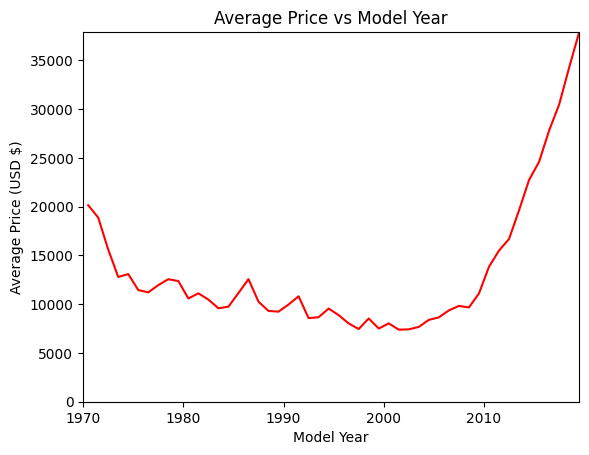

In [6]:
main()